<a href="https://colab.research.google.com/github/Sushmithaa-Pandian/Machine_learning_sush/blob/main/DOA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [53]:
import numpy as np
import pandas as pd
import seaborn as sns

In [239]:
df=pd.read_excel("/content/gdrive/MyDrive/Data.xlsx")

In [304]:
df.head()

,theta,sanpshot1,sanpshot2,sanpshot3,sanpshot4,sanpshot5,sanpshot6,sanpshot7,sanpshot8,sanpshot9,...,sanpshot11,sanpshot12,sanpshot13,sanpshot14,sanpshot15,sanpshot16,sanpshot17,sanpshot18,sanpshot19,sanpshot20
0,0,0.000036,0.000041,0.000102,0.000142,0.048602,0.048936,0.051556,0.052656,0.000025,...,0.000066,0.049989,0.000035,0.000042,0.000060,0.051490,0.049428,0.000025,0.051649,0.048400
1,1,0.000242,0.048908,0.048209,0.000165,0.000055,0.000036,0.050384,0.049726,0.050332,...,0.000148,0.050531,0.047938,0.047116,0.000017,0.049534,0.046587,0.049571,0.049518,0.051270
2,2,0.000160,0.046377,0.000136,0.058347,0.000860,0.048948,0.051798,0.000068,0.048072,...,0.000110,0.058134,0.046259,0.000089,0.051167,0.049258,0.052145,0.000172,0.000092,0.000435
3,3,0.040071,0.053506,0.000613,0.000207,0.056684,0.000749,0.000559,0.000169,0.057459,...,0.001059,0.000246,0.000083,0.000871,0.048813,0.045224,0.047338,0.000344,0.001140,0.043144
4,4,0.067336,0.000609,0.001195,0.054772,0.001732,0.058968,0.049906,0.042941,0.048899,...,0.053252,0.001782,0.001412,0.051787,0.051349,0.059482,0.001141,0.048767,0.001312,0.055870


In [305]:
df.isnull().sum()

theta         0
sanpshot1     0
sanpshot2     0
sanpshot3     0
sanpshot4     0
sanpshot5     0
sanpshot6     0
sanpshot7     0
sanpshot8     0
sanpshot9     0
sanpshot10    0
sanpshot11    0
sanpshot12    0
sanpshot13    0
sanpshot14    0
sanpshot15    0
sanpshot16    0
sanpshot17    0
sanpshot18    0
sanpshot19    0
sanpshot20    0
dtype: int64

In [306]:
y=df["theta"]

In [307]:
x=df.drop("theta",axis=1)

In [308]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(144, 20)
(37, 20)
(144,)
(37,)


In [309]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [246]:
!pip install keras-tuner

In [310]:
from numpy.random import seed
seed(123)

import os
os.environ['PYTHONHASHSEED']=str(123)

import random
random.seed(123)

import tensorflow as tf
tf.random.set_seed(123)

In [346]:

import kerastuner as kt
msle = MeanSquaredLogarithmicError()


def build_model(hp):
  model = tf.keras.Sequential()

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units1 = hp.Int('units1', min_value=32, max_value=512, step=32)
  hp_units2 = hp.Int('units2', min_value=32, max_value=512, step=32)
  hp_units3 = hp.Int('units3', min_value=32, max_value=512, step=32)
  hp_units4 = hp.Int('units4', min_value=32, max_value=512, step=32)
  hp_units5 = hp.Int('units5', min_value=32, max_value=512, step=32)
  model.add(Dense(units=hp_units1, activation='relu'))
  model.add(Dropout(0.5))
  model.add(tf.keras.layers.Dense(units=hp_units2, activation='relu'))
  model.add(Dropout(0.5))
  model.add(tf.keras.layers.Dense(units=hp_units3, activation='relu'))
  model.add(Dropout(0.5))
  model.add(tf.keras.layers.Dense(units=hp_units4, activation='relu'))
  model.add(Dropout(0.5))
  model.add(tf.keras.layers.Dense(units=hp_units5, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, kernel_initializer='normal', activation='linear'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2])

  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
      loss=msle,
      metrics=[msle]
  )

  return model

In [347]:
es = EarlyStopping(monitor='val_mean_squared_logarithmic_error', mode='min', verbose=1, patience=200)

In [348]:

# train the model
history = model.fit(
    x_train,
    y_train,
    epochs=150,
    callbacks = [es],
    use_multiprocessing = True,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/150
2/2 [==============================] - 0s 94ms/step - loss: 0.0205 - mean_squared_logarithmic_error: 0.0202 - val_loss: 0.1187 - val_mean_squared_logarithmic_error: 0.1187
Epoch 2/150
2/2 [==============================] - 0s 37ms/step - loss: 0.0194 - mean_squared_logarithmic_error: 0.0196 - val_loss: 0.1196 - val_mean_squared_logarithmic_error: 0.1196
Epoch 3/150
2/2 [==============================] - 0s 39ms/step - loss: 0.0190 - mean_squared_logarithmic_error: 0.0195 - val_loss: 0.1234 - val_mean_squared_logarithmic_error: 0.1234
Epoch 4/150
2/2 [==============================] - 0s 53ms/step - loss: 0.0145 - mean_squared_logarithmic_error: 0.0144 - val_loss: 0.1259 - val_mean_squared_logarithmic_error: 0.1259
Epoch 5/150
2/2 [==============================] - 0s 39ms/step - loss: 0.0147 - mean_squared_logarithmic_error: 0.0149 - val_loss: 0.1160 - val_mean_squared_logarithmic_error: 0.1160
Epoch 6/150
2/2 [==============================] - 0s 42ms/step - loss: 0.0200 -

In [349]:
predictions = model.predict(x_test)

2/2 [==============================] - 0s 6ms/step


In [350]:
predictions

array([[  9.022807 ],
       [ 44.51739  ],
       [151.84729  ],
       [ 69.65593  ],
       [128.14563  ],
       [  6.318913 ],
       [ 13.18293  ],
       [ 57.38609  ],
       [ 88.36048  ],
       [120.113945 ],
       [ 84.80496  ],
       [135.96954  ],
       [ 59.922146 ],
       [114.26043  ],
       [ 38.500446 ],
       [  6.6842246],
       [ 43.397976 ],
       [106.11813  ],
       [ 79.78932  ],
       [ 41.60517  ],
       [ 84.257484 ],
       [113.97765  ],
       [119.02117  ],
       [ 18.940866 ],
       [ 12.28434  ],
       [141.103    ],
       [ 69.37     ],
       [ 10.704076 ],
       [113.6367   ],
       [135.53868  ],
       [ 83.54333  ],
       [ 45.88101  ],
       [104.99633  ],
       [ 97.08309  ],
       [ 57.16882  ],
       [ 27.446781 ],
       [104.78179  ]], dtype=float32)

In [351]:
import matplotlib.pyplot as plt



dict_keys(['loss', 'mean_squared_logarithmic_error', 'val_loss', 'val_mean_squared_logarithmic_error'])


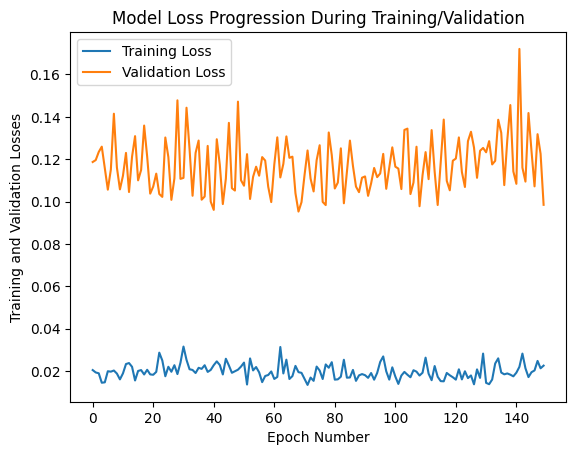

In [352]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

Text(0, 0.5, 'predicted values')

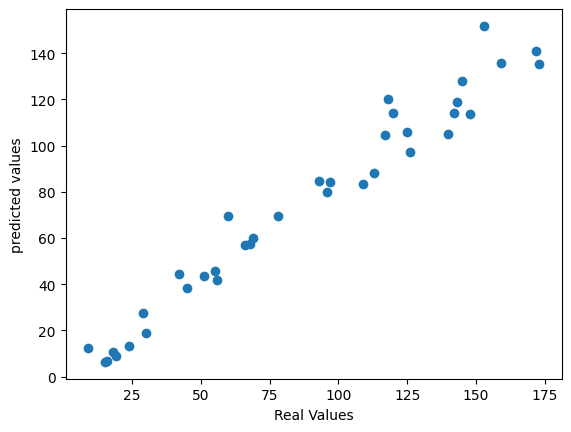

In [355]:
plt.scatter(y_test,predictions)
plt.xlabel("Real Values")
plt.ylabel("predicted values")

In [356]:
from sklearn.metrics import r2_score
score = r2_score(y_test,predictions)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 88.0%


In [357]:
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(y_test,predictions)
print("The Mean Absolute Error of our Model is {}%".format(round(score, 2)))

The Mean Absolute Error of our Model is 14.44%
